<< [第一章：什么是深度学习](Chapter1_What_is_deep_learning.ipynb) || [目录](index.md) || [第三章：进入神经网络](Chapter3-Getting_started_with_neural_networks.ipynb) >>

# 第二章：开始之前：神经网络的数学知识

> Understanding deep learning requires familiarity with many simple mathematical
concepts: tensors, tensor operations, differentiation, gradient descent... Our goal in this
chapter will be to build intuition about these notions without getting overly technical. In
particular, we will steer away from mathematical notation, which can be off-putting for
those without any mathematics background, and isn’t strictly necessary to explain things
well.

要理解深度学习需要你能熟悉很多简单的数学概念：张量、张量操作、微分、梯度下降...我们本章的目标是帮助我们在这些术语上建立感性认识，而不过于技术化。具体来说我们会避开学术化的数学术语，这些术语会让非数学背景的读者感到头疼，但却不是解释原理所严格必须的。

> To put some context around tensors and gradient descent, we will begin the chapter
with our very first practical example of a neural network. Then we will go over every
new concept we have introduced, point by point. Keep in mind that these concepts will
be essential for you to understand the practical examples that will come in the following
chapters!

要建立张量和梯度下降的背景知识，我们在本章开始会介绍我们第一个实际的神经网络的例子。然后我们会在其中每个要点介绍碰到的每一个新概念。记住这些概念对于你理解这个实际例子是必不可少的，而且在后续章节中我们也会经常遇到。

> In this chapter, you will:

> - Take a look at your first working example of a neural network.
- Learn about tensors, the data format underlying all deep learning models.
- Learn about tensor operations, the mathematical building blocks of neural networks.
- Understand the way neural networks learn from data: via gradient descent optimization.

在本章中，你会：

- 看到你的第一个能够工作的神经网络的例子。
- 学习张量相关概念，它是所有深度学习模型底层的数据格式。
- 学习张量操作，它们是神经网络中的数学模型。
- 理解神经网络从数据中学习的方式：使用梯度下降优化。

> After reading this chapter, you will have an intuitive understanding of how neural
networks work, and you will be able to move on to practical applications—which will
start with the next chapter.

读完本章后，你将会对神经网络如何工作有一个直观的认识，后续你能进行在此基础上进行应用实践。我们会在下一章开始这部分内容。

## 2.1 初识神经网络

> We will now take a look at a first concrete example of a neural network, which makes
use of the Python library Keras to learn to classify hand-written digits. Unless you
already have experience with Keras or similar libraries, you will not understand
everything about this first example right away. You probably haven’t even installed
Keras yet. Don’t worry, that is perfectly fine. In the next chapter, we will review each
element in our example and explain them in detail. So don’t worry if some steps seem
arbitrary or look like magic to you! We’ve got to start somewhere.

我们马上会看到神经网络第一个具体的例子，使用Python中的Keras库来学习分类手写数字。除非你已经在实践中使用过Keras或相类似的库，否则你不会立刻理解这个例子。甚至可能你还没有安装Keras。别担心，这没有关系。在下一章中，我们会回顾我们这个例子中的每个元素然后详细解释它们。因此别担心，即使其中某些步骤看起来很随意或者看着像魔术。这就是旅程开始的地方。

> The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is
the MNIST dataset, a classic dataset in the machine learning community, which has been
around for almost as long as the field itself and has been very intensively studied. It’s a
set of 60,000 training images, plus 10,000 test images, assembled by the National
Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think
of "solving" MNIST as the "Hello World" of deep learning—it’s what you do to verify
that your algorithms are working as expected. As you become a machine learning
practitioner, you will see MNIST come up over and over again, in scientific papers, blog
posts, and so on. You can take a look at some MNIST samples in figure 2.1.

这里我们尝试解决的问题是对手写数字的灰度图进行分类（28x28像素），将它们分到10个不同的种类中（0到9）。这里我们会用到MNIST数据集，这是一个机器学习社区一个经典的数据集，它的历史基本上与这个领域本身一样长，并且已经被深入的研究过。这个数据集有着60000训练图像加上10000测试图像，在1980年代由国家标准化和技术机构采集的（NIST名称的由来）。你可以认为“解决”MNIST问题就像深度学习中的“Hello World”一样 - 它可以用来验证你的算法是否按照你的预期来工作。当你成为了机器学习的实践者后，你会发现MNIST数据集会不断的出现，在科学论文中，博客文章中等等。在图2.1中你可以看到一下MNIST的样例。

```
注 - 类别和标签

在机器学习中，分类问题中的一个类别（“category”）被称为一个类（“class”）。数据点被称为样本（“samples”）。与某个特定样本关联的类被称为标签（“label”）。
```

![MNIST](imgs/f2.1.jpg)

图2.1 MNIST样本数字图像

> You don’t need to try to reproduce this example on your machine just now. If you
wish to, you will first need to set up Keras, which is covered in section 3.3.

目前你还不需要在你的电脑上重现这个例子。如果你希望这样做，你首先需要安装Keras，我们会在3.3小节中介绍。

> The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy
arrays:

Keras中预装了MNIST数据集，由四个Numpy数组组成：

In [1]:
# 读取MNIST数据
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

> train_images and train_labels form the "training set", the data that the model
will learn from. The model will then be tested on the "test set", test_images and
test_labels . Our images are encoded as Numpy arrays, and the labels are simply an
array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the
images and the labels.

train_images和train_labels组成了“训练集”，这是用来给模型进行学习的数据。然后模型会在“测试集”上进行测试，它们是由test_images和test_labels组成。我们的图像已经编码到Numpy的数组当中，而标签数据就是简单的一个数字数组，从0到9。图像和标签之间有着一对一的关系。

> Let’s have a look at the training data:

下面我们来看一下训练数据：

In [2]:
# 训练图像的形状
train_images.shape

(60000, 28, 28)

In [3]:
# 训练标签的个数
len(train_labels)

60000

In [4]:
# 查看训练标签的数组
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

> Let’s have a look at the test data:

然后再看一下测试数据：

In [5]:
# 测试图像的形状
test_images.shape

(10000, 28, 28)

In [6]:
# 测试标签的个数
len(test_labels)

10000

In [7]:
# 查看测试标签数组
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

> Our workflow will be as follow: first we will present our neural network with the
training data, train_images and train_labels . The network will then learn to
associate images and labels. Finally, we will ask the network to produce predictions for
test_images , and we will verify if these predictions match the labels from
test_labels .

我们的流程如下：首先我们会为我们的神经网络提供训练数据，也就是train_images和train_labels。网络随后会从关联的图像和标签进行学习。最后，我们会要求网络对测试集图像test_images进行预测，然后使用测试集标签test_labels对模型进行验证。

> Let’s build our network—again, remember that you aren’t supposed to understand
everything about this example just yet.

下面我们来构建我们的网络。再次说明，目前你不必理解这个例子的所有内容。

In [8]:
# 引入模型和表示层
from tensorflow.keras import models
from tensorflow.keras import layers

In [9]:
# 使用线性模型作为网络
network = models.Sequential()

In [10]:
# 在模型中添加两个全连接层
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

> The core building block of neural networks is the "layer", a data-processing module
which you can conceive as a "filter" for data. Some data comes in, and comes out in a
more useful form. Precisely, layers extract representations out of the data fed into
them—hopefully representations that are more meaningful for the problem at hand. Most
of deep learning really consists of chaining together simple layers which will implement
a form of progressive "data distillation". A deep learning model is like a sieve for data
processing, made of a succession of increasingly refined data filters—the "layers".

神经网络的核心构建单元是层（“layer”），这是一个数据处理模块，你可以认为它就像数据的一个“过滤器”。一些数据输入进来，然后以一种更加有用的格式输出出去。精确的说，层能够从输入给它的数据中提取出表现形式出来，使得这种表现形式会对于解决手头的问题更加有意义。大多数的深度学习都由多个简单层串联组成，它们会实现渐进式的“数据蒸馏”过程。一个深度学习模型就像一个数据处理的筛子一样，内含多个连续的不断优化的数据过滤器，也就是“层”。

> Here our network consists of a sequence of two Dense layers, which are
densely-connected (also called "fully-connected") neural layers. The second (and last)
layer is a 10-way "softmax" layer, which means it will return an array of 10 probability
scores (summing to 1). Each score will be the probability that the current digit image
belongs to one of our 10 digit classes.

上面的模型包含有两个连续的全连接层（Dense），它们都是密集连接的（也被称为“全连接的”）。第二层（最后）是一个10-通道的“softmax”层，这表明它会返回由10个概率分值组成数组（总和为1）。其中的每个分值代表这当前这张数字图像从属于10个数字分类中的概率。

> To make our network ready for training, we need to pick three more things, as part of
"compilation" step:

> - A loss function: the is how the network will be able to measure how good a job it is
doing on its training data, and thus how it will be able to steer itself in the right direction.
- An optimizer: this is the mechanism through which the network will update itself based
on the data it sees and its loss function.
- Metrics to monitor during training and testing. Here we will only care about accuracy

要让我们的网络能够训练，我们还需要准备三样东西，它们会参与到“编译”过程中：

- 损失函数：这是网络用来衡量训练质量的标准，有了损失反馈模型才能自己导向到正确的目标。
- 优化器：这是网络根据数据和损失函数来更新自身参数的机制。
- 在训练和测试过程中监控的指标。这里我们仅关心准确率。

> The exact purpose of the loss function and the optimizer will be made clear
throughout the next two chapters.

损失函数和优化器的准确解释我们会在接下来的两章中详细介绍。

In [11]:
# 编译模型
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
                metrics=['accuracy'])

> Before training, we will preprocess our data by reshaping it into the shape that the
network expects, and scaling it so that all values are in the [0, 1] interval. Previously,
our training images for instance were stored in an array of shape (60000, 28, 28) of
type uint8 with values in the [0, 255] interval. We transform it into a float32 array
of shape (60000, 28 * 28) with values between 0 and 1.

在训练之前，我们还需要将数据变成网络期望的形状，然后将它其中的所有数值压缩到$[0, 1]$区间。前面看到，我们的训练图像保存在一个(60000, 28, 28)形状的数组中，里面的数值是一个$[0, 255]$区间中的uint8类型数值。我们会将它转换成一个float32的数组，形状仍为(60000, 28 * 28)，其中的数值都在0到1之间。

In [13]:
# 转换训练图像的形状，将所有维度的数据标准化到[0, 1]区间中
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

# 转换测试图像的形状，将所有维度的数据标准化到[0, 1]区间中
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

> We also need to categorically encode the labels, a step which we explain in chapter 3:

我们还需要将标签进行分类编码，这个步骤我们会在第三章解释：

In [14]:
# 将训练标签和测试标签都进行分类编码
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

> We are now ready to train our network, which in Keras is done via a call to the fit
method of the network: we "fit" the model to its training data.

现在我们已经准备好，可以开始训练我们的网络了，这个步骤在Keras中通过一个fit方法调用就能完成：意思是让模型去适配它的训练数据。

In [15]:
# 训练模型
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 1.4706 - accuracy: 0.6653
Epoch 2/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.5847 - accuracy: 0.8524
Epoch 3/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4098 - accuracy: 0.8887
Epoch 4/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3523 - accuracy: 0.9012
Epoch 5/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3237 - accuracy: 0.9075


> Two quantities are being displayed during training: the "loss" of the network over the
training data, and the accuracy of the network over the training data.

在训练过程中，有两个值会显示在结果中：网络在训练数据上的“损失”以及网络在训练数据上的准确率。

> We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let’s
check that our model performs well on the test set too:

我们很快就在训练数据上达到了0.989的准确率。下面我们来检查一下我们的模型在测试集上的表现：

译者注：上面是原文照译，在译者的笔记本电脑上，准确率远远未达到0.989。

In [16]:
# 使用模型预测测试图像，并使用测试标签验证准确率
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 53.7294 - accuracy: 0.8192
test_acc: 0.8192


> Our test set accuracy turns out to be 97.8%—that’s quite a bit lower than the training
set accuracy. This gap between training accuracy and test accuracy is an example of
"overfitting", the fact that machine learning models tend to perform worse on new data
than on their training data. Overfitting will be a central topic in chapter 3.

我们的测试准确率达到了97.8% - 这比在训练集上的准确率要低一点。这个训练准确率和测试准确率之间的差距就是一个“过拟合”的例子，它表达了机器学习模型倾向于在新数据上的表现要低于在训练数据上的表现的事实。过拟合将会是第三章的中心主题。

译者注：原文照译，事实上在译者机器上测试集只跑出了81.9%的准确率。

> This concludes our very first example—you just saw how we could build and a train a
neural network to classify handwritten digits, in less than 20 lines of Python code. In the
next chapter, we will go in detail over every moving piece we just previewed, and clarify
what is really going on behind the scenes. You will learn about "tensors", the data-storing
objects going into the network, about tensor operations, which layers are made of, and
about gradient descent, which allows our network to learn from its training examples.

这里总结一下我们第一个例子 - 你刚才看到了我们如何构建和训练一个神经网络来分类手写数字，使用了不到20行的Python代码。在下一章中，我们会详细的回顾这个例子中的每一个部分，并且阐明在现象之后的原理。下面你会学习到有关“张量”，进入网络的数据存储对象，还会学习到有关张量操作，也就是层的组成，以及梯度下降，令我们的网络能够从训练样本中不断学习。

## 2.2 神经网络中的数据表示

> In our previous example, we started from data stored in multi-dimensional Numpy arrays,
also called "tensors". In general, all machine learning systems in our time use tensors as
their basic data structure. Tensors are fundamental to the field—so fundamental in fact,
that Google’s TensorFlow was named after them. So what’s a tensor?

在前面的例子中，我们的数据存储在多维的Numpy数组中，也被称为“张量”。通常现在所有的机器学习系统都使用张量作为基本的数据结构。张量是机器学习中最基本的概念。这个概念是如此基础，以至于Google的TensorFlow框架都使用它来命名。那么什么是张量？

> At its core, a tensor is a container for data—almost always numerical data. So, a
container for numbers. You may be already familiar with matrices, which are 2D tensors:
tensors are merely a generalization of matrices to an arbitrary number of dimensions
(note that in the context of tensors, "dimension" is often called "axis").

在底层，一个张量就是数据容器，里面基本上都是数值型的数据。因此也可以认为是数值的容器。你可能已经熟悉了矩阵，它们是2D的张量：张量不外乎就是矩阵推广到任意维度的泛化类型（请注意在张量的上下文中，“维度”通常被称为“轴”）。

### 2.2.1 标量（0D的张量）

> A tensor that contains only one number is called a "scalar" (or "scalar tensor", or
0-dimensional tensor, or 0D tensor). In Numpy, a float32 or float64 number is a
scalar tensor (or scalar array). You can display the number of axes of a Numpy tensor via
the ndim attribute; a scalar tensor has 0 axes ( ndim == 0 ). The number of axes of a
tensor is also called its rank .

一个仅含一个数值的张量被成为“标量”（或者是“标量张量”，或者零维张量，或者0D张量）。在Numpy中，一个float32或float64数值是一个标量（或者标量数组）。你可以使用Numpy张量的ndim属性显示它的坐标轴数量；一个标量具有0个坐标轴（ndim == 0）。一个张量的坐标轴数量也被成为它的秩（rank）。

In [17]:
import numpy as np

In [18]:
x = np.array(12)
x

array(12)

In [19]:
x.ndim

0

### 2.2.2 矢量（1D张量）

> An array of numbers is called a vector, or 1D tensor. A 1D tensor will be said to have
exactly one "axis":

一系列的数值被成为一个矢量，或者1D张量。一个1D张量即只含有一个坐标轴：

In [20]:
x = np.array([12, 3, 6, 14])
x

array([12,  3,  6, 14])

In [21]:
x.ndim

1

> Here, this vector has 5 entries, and so will be a called a "5-dimensional vector". Do
not confuse a 5D vector with a 5D tensor! A 5D vector has only one axis and has 5
dimensions along its axis, while a 5D tensor has 5 axes (and may have any number of
dimensions along each axis). "Dimensionality" can either denote the number of entries
along a specific axis (e.g. in the case of our 5D vector), or the number of axes in a tensor
(e.g. a 5D tensor), which can be quite confusing at times. In the latter case, it is
technically more correct to talk about "a tensor of rank 5" (the rank of a tensor being the
number of axes), but the ambiguous notation "5D tensor" is very common regardless.

这里的矢量有5个元素，因此它也被叫做“5-维矢量”。不要混淆了5D矢量和5D张量！一个5D矢量只有一个轴然后沿着这个轴有5个维度，而一个5D张量有着5个轴（在每个轴上都有着任意数量的维度）。“维度”这个术语既可以表示沿着特定轴的元素个数（例如在一个5D矢量中），或者在张量中表示轴的数量（例如一个5D张量），有时这个概念会让人很迷惑。在后一种情形中，技术上我们可以更加正确的表述为“一个秩为5的张量”（张量的秩就是轴的数量），但是模糊的表述“5D张量”仍然经常会出现。

译者注：原文照译，上例中的矢量应该是4个维度，而不是5个。

### 矩阵（2D张量）

> An array of vectors is a matrix, or 2D tensor. A matrix has two axes (often denoted
"rows" and "columns"). You can visually interpret a matrix as a rectangular grid of
numbers:

矢量的数组叫做矩阵，或者2D张量。一个矩阵有两个轴（经常表述为“行”row和“列”column）。你可以认为矩阵是一个数值组成的矩形网格：

In [22]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

> The entries from the first axis are called the "rows", and the entries from the second
axis are called the "columns". In our example above, [5, 78, 2, 34, 0] is the first
row of x , and [5, 6, 7] is the first column.

沿着第一个轴的元素被称为“行”，沿着第二个轴的元素被称为“列”。在上例中，$[5, 78, 2, 34, 0]$是x的第一行，而$[5, 6, 7]$是第一列。

### 2.2.4 3D张量和高维张量

> If you pack such matrices in a new array, you obtain a 3D tensor, which you can visually
interpret as a cube of numbers:

如果你将多个矩阵封装到一个新的数组中，你就会得到一个3D张量，你可以认为是一个数值组成的立方体：

In [23]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

> By packing 3D tensors in an array, you can create a 4D tensor. And so on. In deep
learning, you will generally manipulate tensors that are 0D to 4D, although you may go
up to 5D if you process video data.

将3D张量封装到一个新数组中，你会得到一个4D张量，以此类推。在深度学习中，你通常会操作从0D到4D的张量，当然如果你要处理视频数据，你也会碰到5D张量。

### 2.2.5 关键属性

> A tensor is defined by 3 key attributes:

> - The number of axes it has, its rank . For instance, a 3D tensor has 3 axes, and a matrix has
2 axes. This is also called the tensor’s ndim , throughout Python libraries such as Numpy.
- Its shape. This is a tuple of integers that describes how many dimensions the tensor has
along each axis. For instance, our matrix example above has shape (3, 5) , and our 3D
tensor example had shape (3, 3, 5) . A vector will have a shape with a single element,
such as (5,) , while a scalar will have an empty shape, () .
- Its data type (usually called dtype throughout Python libraries). This is the type of the
data contained inside the tensor; for instance a tensor’s type could be float32 , uint8 ,
float64 ... In rare occasions you may witness a char tensor. Note that string tensors
don’t exist in Numpy (nor in most other libraries), since tensors live in pre-allocated
contiguous memory segments, and strings, being variable-length, would preclude the use
of this implementation.

一个张量是由3个关键属性定义的：

- 张量轴的数量，或者它的秩。例如，一个3D张量有着3个轴，而一个矩阵有着2个轴。这也被叫做张量的ndim，因为Python中的Numpy就是这个命名。
- 张量的形状。这是一个整数组成的元组，每个整数代表张量沿着这个轴的维度。例如，上面例子中的矩阵的形状是$(3, 5)$，而3D张量的形状是$(3, 3, 5)$。一个矢量有着只有单个元素的形状，例如$(5,)$，而标量有着空的形状$()$。
- 张量的数据类型（通常在Python库中被叫做dtype）。这是代表这张量内部的数值数据类型；例如张量的类型可以是float32，uint8，float64等等。在极少数的情况下，你可能会碰到字符类型的张量。注意的是字符串类型的张量在Numpy之中并不存在（在许多其他的库中也不存在），因为张量的存储空间是预先分配的连续内存段，而字符串因为有着可变的长度，被排除在这种实现之外。

> To make this more concrete, let’s take a look back at the data we processed in our
MNIST example:

更加具体的来说，我们看一下我们之前处理的MNIST数据集的例子：

In [24]:
# 读取MNIST数据集
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
# 输出训练图像的秩
print(train_images.ndim)

3


In [26]:
# 输出训练图像的形状
print(train_images.shape)

(60000, 28, 28)


In [27]:
# 输出训练图像的数据类型
print(train_images.dtype)

uint8


> So what we have here is a 3D tensor of 8-bit integers. More precisely, it is an array of
60,000 matrices of 28x28 integers. Each such matrix is a grayscale image, with
coefficients between 0 and 255.

因此这里我们有一个3D张量，内含8比特的整数。更加精确的来说，这是一个有着60000个28x28个整数的数组。每个这样的矩阵都是一张灰度图，其系数处于0到255区间。

> Let’s display the 4th digit in this 3D tensor, using the library Matplotlib (part of the
standard scientific Python suite):

下面让我们显示这个3D张量中的第四个数字，这里我们使用Matplotlib库（它是标准Python科学套件的一部分）：

译者注：原文照译，按照代码来说，应该是第五个数字，而不是第四个。

In [28]:
# 取第5张图像
digit = train_images[4]

import matplotlib.pyplot as plt

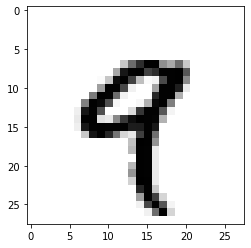

In [29]:
%matplotlib inline

# 显示图像
plt.imshow(digit, cmap=plt.cm.binary)
# plt.show()

### 2.2.6 在Numpy中操作张量

> In the example above, we "selected" a specific digit alongside the first axis using the
syntax train_images[i] . "Selecting" specific elements in a tensor is called "tensor
slicing". Let’s take a look at the tensor slicing operations that you can do on Numpy
arrays.

在上面的例子中，我们沿着第一个轴“选择了”一个特定的数字，使用的语法是`train_images[i]`。在张量中”选择“特定的元素被称为”张量切片“。下面我们来看看Numpy当中对张量可以进行哪些切片操作。

> The following selects digits #10 to #100 and puts them in an array of shape (90, 28,
28) :

下面的代码将选择出从第10个到第100个数字，将它们放在一个形状为$(90, 28, 28)$的数组中：

译者注：原文照译，事实上取的是第11个到第100个数字。

In [30]:
# 对第一个轴进行切片，得到第11个到第100个元素
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


> It is equivalent to this more detailed notation, where one specifies a start index and
stop index for the slice along each tensor axis. Note that : will simply be equivalent to
selecting the entire axis.

这等同于下面这个更加详细的代码写法，下面指明了每个轴上的开始序号和结束序号。注意其中的`:`简单的等同于选择了整个轴的数据。

In [31]:
# 与上例完全相同
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [32]:
# 也完全相同
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

> In general, one may select between any two indices along each tensor axis. For
instance, in order to select 14x14 pixels in the bottom right corner of all images, one
would do:

概括来说，你可以使用任何的两个序号来对张量的轴进行切片选择。例如，如果你需要选择所有图像右下角的14x14像素的部分，你可以：

In [33]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

> It is also possible to use negative indices. Much like negative indices in Python lists,
they indicate a position relative to the end of the current axis. In order to crop our images
to patches of 14x14 pixels centered in the middle, one would do:

还可以使用负数的序号。就像在Python列表中使用负数序号的效果一样，它们指代的是距离当前轴末尾位置的相对距离。如果我们需要截取每张图像中央14x14像素的部分，可以：

In [34]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### 2.2.7 数据批次的表示

> In general, the first axis (axis 0, since indexing starts at 0) in all data tensors you will
come across in deep learning will the be "samples axis" (also called "samples dimension"
sometimes). In the MNIST example, "samples" are simply images of digits.

通常来说，在深度学习中数据集张量的第一个轴（axis 0，因为序号都是从0开始的）就是“样本轴”（或者有时叫做“样本维度”）。在MNIST例子中，“样本”就是数字的图像。

> Besides, deep learning models do not process an entire dataset at once, rather they
break down the data into small batches. Concretely, here’s one batch of our MNIST
digits, with batch size of 128:

然后，深度学习模型不会一次性的处理整个数据集，而是将数据拆散成一小块一小块，称为批次。具体来说，下面是MNIST数据集的一个批次，批次的大小是128：

In [35]:
# 这是第一个批次，使用Numpy切片产生
batch = train_images[:128]

# 下面是第二个批次
batch = train_images[128:256]

# 下面是第n个批次，原文照译，实际上应该是第n+1个批次，后面为译者所加，才是第n个批次
n = 10
batch = train_images[128 * n:128 *(n + 1)]

batch = train_images[128 *(n - 1): 128 * n]

> When considering such a batch tensor, the first axis (axis 0) is called the "batch axis"
or "batch dimension". This is a term you will frequently encounter when using Keras or
other deep learning libraries.

当使用这样的批次张量时，第一个轴（axis 0）被称为“批次轴”或者“批次维度”。你会在Keras或其他深度学习库中经常碰到这个术语。

### 2.2.8 真实世界的数据张量例子

> Let’s make data tensors more concrete still with a few examples similar to what you will
encounter later on.

现在我们将你后面可能碰到的各种数据张量的类型和例子列举出来。

> The data you will manipulate will almost always fall into one of the following
categories:

> - Vector data: 2D tensors of shape (samples, features) .
- Timeseries data or sequence data: 3D tensors of shape (samples, timesteps,
features) .
- Images: 4D tensors of shape (samples, width, height, channels) or (samples,
channels, width, height) .
- Video: 5D tensors of shape (samples, frames, width, height, channels) or
(samples, frames, channels, width, height) .

你会操作到的数据几乎都属于下面几个类别之一：

- 矢量数据：2D张量，形状（样本，特征值）。
- 时序数据或序列数据：3D张量，形状（样本，时间步长，特征值）。
- 图像：4D张量，形状（样本，宽度，高度，通道）或者（样本，通道，宽度，高度）。
- 视频：5D张量，形状（样本，帧，宽度，高度，通道）或者（样本，帧，通道，宽度，高度）。

### 2.2.9 矢量数据

> This is the most common case. In such a dataset, each single data point can be encoded as
a vector, and thus a batch of data will be encoded as a 2D tensor (i.e. an array of vectors),
where the first axis is the "samples axis" and the second axis is the "features axis".

> Let’s take a look at a few concrete examples:

> - An actuarial dataset of people, where we consider for each person their age, zipcode, and
income. Each person can be characterized as a vector of 3 values, and thus an entire
dataset of 100,000 people can be stored in a 2D tensor of shape (100000, 3) .
- A dataset of text documents, where we represent each document by the counts of how
many times each word appears in it (out of a dictionary of 20,000 common words). Each
document can be encoded as a vector of 20,000 values (one count per word in our
dictionary), and thus an entire dataset of 500 documents can be stored in a tensor of shape
(500, 20000) .

这是最常见的场景。在这种数据集中，每个独立的数据点都被编码成一个矢量，因此这样的数据整体上被编码成一个2D张量（即矢量的数组），里面第一个轴是“样本轴”而第二个轴是“特征轴”。

下面来看几个更具体的例子：

- 比如一个真实的人口数据集，里面我们记录了每个人的年龄、邮政编码和收入。每个人都能被一个具有3个值（维度）的矢量所特征化，因此一个有10万人的整个数据集可以保存在一个形状是$(100000, 3)$的2D张量当中。
- 再比如一个文本文档的数据集，我们将每个文档表示成其中每个单词出现的次数（如一本字典中有20000个常用单词）。每个文档因此可以被编码为一个具有20000个值的矢量（我们字典中每个单词都有一个计数值），因此整个具有500个文档的数据集就会保存在一个形状是$(500, 20000)$张量当中。

### 2.2.10 时序数据或序列数据

> Whenever time matters in your data (or the notion of sequence order), it makes sense to
store it in a 3D tensor with an explicit time axis. Each sample can be encoded as a
sequence of vectors (a 2D tensor), and thus a batch of data will be encoded as a 3D
tensor.

> The time axis will always be the second axis (axis of index 1), by convention. Let’s
have a look at a few examples:

> - A dataset of stock prices. Every minute, we store the current price of the stock, the
highest price in the past minute and the lowest price in the past minute. Thus every
minute is encoded as a 3D vector, an entire day of trading is encoded as a 2D tensor of
shape (390, 3) (there are 390 minutes in a trading day), and 250 days worth of data can
be stored in a 3D tensor of shape (250, 390, 3) . Here, each sample would be one day
worth of data.
- A dataset of tweets, where we encode each tweet as a sequence of 140 characters out of
an alphabet of 128 unique characters. In this setting, each character can be encoded as a
binary vector of size 128 (an all-zeros vector except for a 1 entry at the index
corresponding to the character). Then each tweet can be encoded as a 2D tensor of shape
(140, 128) , and a dataset of 1M tweets can be stored in a tensor of shape (1000000,
140, 128) .

如果你的数据与时间相关（或者是某种序列编号），那么理所当然的我们就会想到使用一个3D张量来存储它们，这里多出了一个时间的轴。每个样本可以被编码成一个矢量（2D张量）的序列，那么多个样本就是一个3D张量。

时间轴在习惯上永远是第二个轴（序号为1）。我们看一些具体例子：

- 一个股价的数据集。每分钟都存储当前的股价、过去一分钟内最高价和最低价。因此每分钟可以编码成为一个三维的矢量，交易日的市场情况可以编码成一个2D张量，形状是$(390, 3)$（每个交易日内有390分钟），250个交易日的数据将被存储在一个形状为$(250, 390, 3)$的3D张量中。这个数据集中，每个样本都是一天的股价情况。
- 推特的数据集，这里我们将每条推特编码成一个140个字符组成的序列，其中的每个字符都是128个不同的字符编码。这样的情况下，每个字符可以看成是一个二元的128维矢量（除了当前字符为1外，其他127个字符编码的值都是0）。那么每条推特就是一个形状为$(140, 128)$的2D张量，包含了1百万条推特的整个数据集会存储在一个形状为$(1000000, 140, 128)$的3D张量中。

![3D timeseries tensor](imgs/f2.3.jpg)

图2-3 一个3D的时间序列张量

### 2.2.11 图像数据

> Images typically have 3 dimensions: width, height, and color depth. Although grayscale
images (like our MNIST digits) only have a single color channel and could thus be stored
in 2D tensors, by convention image tensors are always 3D, with a 1-dimensional color
channel for grayscale images.

图像有着典型的三个维度：宽度，高度和色深。虽然灰度图像（像前面的MNIST数字）只有一个颜色通道，因此可以被存储在2D张量中，但是习惯上图像张量都是3D的，对于灰度图来说那就是一个1维的颜色通道轴。

> A batch of 128 grayscale images of size 256x256 could thus be stored in a tensor of
shape (128, 256, 256, 1) , and a batch of 128 color images could be stored in a tensor
of shape (128, 256, 256, 3) .

一批次比方说128幅大小是256x256的灰度图像会被存储在一个形状为$(128, 256, 256, 1)$的张量中，而128张这样的彩色图像会被存储在一个形状为$(128, 256, 256, 3)$的张量中。

> There are two conventions for shapes of images tensors: the TensorFlow convention
and the Theano convention.

有两种流行的图像张量形状：TensorFlow的习惯和Theano的习惯。

> The TensorFlow machine learning framework, from Google, places the color depth
axis at the end, as we just saw: (samples, width, height, color_depth) .
Meanwhile, Theano places the color depth axis right after the batch axis: (samples,
color_depth, width, height) . With the Theano convention, our examples above
would become (128, 1, 256, 256) and (128, 3, 256, 256) . The Keras framework
provides support for both formats.

谷歌的TensorFlow机器学习框架将色深轴放在最后，就像上面看到的那样：(样本，宽度，高度，色深)。而Theano却将色深轴直接放在样本轴之后：(样本，色深，宽度，高度)。如果上面的例子使用Theano习惯的话将会变成$(128, 1, 256, 256)$和$(128, 3, 256, 256)$。Keras框架支持全部两种格式。

![4D image tensor](imgs/f2.4.jpg)

图2-4 一个4D的图像数据张量

### 2.2.12 视频数据

> Video data is one of the few types of real-world data for which you will need 5D tensors.
A video can be understood as a sequence of frames, each frame being a color image.
Since each frame can be stored in a 3D tensor (width, height, color_depth) , then a
sequence of frames can be stored in 4D tensor (frames, width, height,
color_depth) , and thus a batch of different videos can be stored in a 5D tensor of shape
(samples, frames, width, height, color_depth) .

在真实世界数据中你很少会需要使用5D张量，而视频数据却是其中的一种。一个视频可以看成是一系列帧的组合，每一帧都是一张彩色图像。因为每一帧都会被保存在3D张量(宽度，高度，色深)中，那么一系列帧就能被保存在4D张量(帧序号，宽度，高度，色深)中，然后一批不同的视频可以被存储在一个形状为(样本，帧序号，宽度，高度，色深)的5D张量中。

> For instance, a 60-second, 256x144 YouTube video clip sampled at 4 frames per
second would have 240 frames. A batch of 4 such video clips would be stored in a tensor
of shape (4, 240, 256, 144, 3) . That’s a total of 106,168,320 values! If the dtype of
the tensor is float32 , then each value is stored in 32 bits , so the tensor would
represent 425MB. Heavy! Videos you encounter in real life are much lighter because
they are not stored in float32 and they are typically compressed by a large factor (e.g.
in the MPEG format).

例如一段60秒时长，256x144的油管视频片段，每秒取样4帧的话共有240帧。4段这样的视频片段组成的张量形状是$(4, 240, 256, 144, 3)$。这里一共有106168320个值！如果张量的数据类型是float32，意即每个值都需要32比特来存储，因此这个张量共需要425MB。很占资源！你在真实生活中碰到的视频通常都小很多因为它们不是存储在float32类型上，并且它们通常都使用很高的比率进行了压缩（例如MPEG格式）。

## 2.3 张量操作：神经网络的齿轮

> Much like any computer program can be ultimately reduced to a small set of binary
operations on binary inputs (such as AND, OR, NOR, etc.), all transformations learned
by deep neural networks can be reduced to a handful of "tensor operations" applied to
tensors of numeric data. For instance, it is possible to add tensors, multiply tensors, and
so on.

就像任何的计算机程序能被最终概括成一小集合的二进制运算（例如与、或、非等）一样，所有深度神经网络学习到的转换都能被概括成一小部分“张量操作”。例如能够进行张量相加或者相乘运算。

> In our initial example, we were building our network by stacking Dense layers on top
of each other. A layer instance looks like this:

在上一节我们的入门例子中，我们通过将全连接层堆叠在一起构建了网络。一个层的实例就像下面这样：

In [38]:
import tensorflow as tf
tf.keras.layers.Dense(256, activation='relu')

> This layer can be interpreted as a function, which takes as input a 2D tensor and
returns another 2D tensor—a new representation for the input tensor. Specifically, the
following function (where W is a 2D tensor and b is a vector, both attributes of the layer):

这个层可以被阐释为一个函数，它接受一个2D张量作为输入然后返回另一个2D张量 - 实际上就是输入张量的新的表现形式。具体来说就是下面这个函数（其中W是一个2D张量，b是一个矢量，这两个值是层自身的属性）：

$$output = relu(dot(W, input) + b)$$

> Let’s unpack this. We have three tensor operations here: a dot product ( dot ) between
the input tensor and a tensor named W , an addition ( + ) between the resulting 2D tensor
and a vector b , and finally a relu operation. relu(x) is simply max(x, 0) .

下面我们将这条公式解构。我们可以看到三种张量操作：一个作用在输入张量和W张量之间的点乘操作，一个作用来乘法结果2D张量和矢量b之间的加法操作，最后是一个relu操作。可以简单的认为relu(x)就是max(x, 0)。

译者注：relu，[线性整流单元](https://zh.wikipedia.org/wiki/%E7%BA%BF%E6%80%A7%E6%95%B4%E6%B5%81%E5%87%BD%E6%95%B0)

> Although this section deals entirely with linear algebra expressions, you won’t find
any mathematical notation here. We’ve found that mathematical concepts could be more
readily mastered by programmers with no mathematical background if they were
expressed as short Python snippets instead of mathematical equations. So we will use
Numpy code all along.

虽然本小节都会涉及线性代数表达式，但是你不会看到任何数学的记号和公式。我们发现把这些数学概念写在Python代码片段中，而不是写在数学方程中，对于没有数学背景的程序猿来说会更加易读易理解。所以我们会坚持使用Numpy的代码。

### 2.3.1 逐个元素运算

> The "relu" operation and the addition are element-wise operations, i.e. operations that are
applied independently to each entry in the tensors considered. This means that these
operations are highly amenable to massively parallel implementations (so-called
"vectorized" implementations, a term which come from the "vector processor"
supercomputer architecture from the 1970-1990 period). If you wanted to write a naive
Python implementation of an element-wise operation, you would use a for loop:

上面的relu操作和加法是逐元素操作，也就是说这些操作会独立的应用到张量中的每个数值之上。这意味着这些运算十分适合大型并行化实现（也被称为“矢量化”实现，这个名称来自于1970-1990年间一种叫“矢量处理器”的超级计算机架构）。如果你希望写一个原始的逐元素操作的Python实现的话，你需要用到for循环：

In [39]:
def naive_relu(x):
    '''
    naive_relu 自己实现的一个原始版本的relu矢量化函数
    参数x 输入的2D张量
    返回 一个新的2D张量，里面的每个元素都是经过线性整流单元函数后的值
    '''
    # x必须是一个2D张量
    assert len(x.shape) == 2

    x = x.copy() # 避免修改了原始输入张量
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0) # relu函数
    return x

In [40]:
def naive_add(x, y):
    '''
    naive_add 自己实现的一个原始版本的矢量加法函数
    参数x，y 参与加法的两个2D张量
    返回 一个新的2D张量，里面的每个元素都是输入张量元素相加后的结果
    '''
    # x 和 y 必须是2D张量
    assert len(x.shape) == 2
    assert x.shape == y.shape

    x = x.copy() # 避免修改了原始输入张量
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j] # 逐元素相加
    return x

> On the same principle, you can do element-wise multiplication, subtraction, and so
on.

运用相同的技巧，你还能实现逐元素乘法，减法等等。

> In practice, when dealing with Numpy arrays, these operations are available as
well-optimized built-in Numpy functions, which themselves delegate the heavy lifting to
a BLAS implementation (Basic Linear Algebra Subprograms) if you have one installed,
which you should. BLAS are low-level, highly-parallel, efficient tensor manipulation
routines typically implemented in Fortran or C.

在实践中，当处理的是Numpy数组时，这些操作都在Numpy中內建了优化的函数实现，这些函数会将这个繁重的任务分配给你系统中的一个BLAS（基础线性代数子程序）实现上。BLAS是底层的、高度并行化的和高效的张量运算程序，通常使用Fortran或者C来实现。

> So in Numpy you can do the following, and it will be blazing fast:

因此在Numpy中，你可以像下面一样操作张量，它们运行的飞快：

In [44]:
import numpy as np

x = np.random.rand(128, 256, 256, 3)
y = np.random.rand(128, 256, 256, 3)

# 张量的逐元素加法
z = x + y

In [45]:
# 查看加法运行效率
%timeit x + y

51.7 ms ± 3.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
# relu
t = np.maximum(z, 0)

In [47]:
# 查看relu运行效率
%timeit np.maximum(z, 0)

The slowest run took 9.93 times longer than the fastest. This could mean that an intermediate result is being cached.
242 ms ± 153 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 2.3.2 广播

> In our naive implementation of naive_add above, we only support the addition of 2D
tensors with identical shapes. But in the Dense layer introduced earlier, we were adding a
2D tensor with a vector. What happens with addition when the shape of the two tensors
being added differ?

在我们前面矢量加法的原始实现naive_add中，仅能支持一个2D张量与另一个和它相同形状的张量进行加法运算。但是在前面介绍过的全连接层里，我们需要将一个2D张量和一个矢量进行相加。那么当两个参与加法运算的张量形状不同时会发生什么呢？

> When possible and if there is no ambiguity, the smaller tensor will be "broadcasted"
to match the shape of the larger tensor. Broadcasting consists in two steps:

> 1. axes are added to the smaller tensor to match the ndim of the larger tensor (called
broadcast axes).
2. the smaller tensor is then repeated alongside these new axes, to match the full shape of
the larger tensor.

在可能并且没有歧义的情况下，较小的张量会被“广播”来符合较大张量的形状。广播包含这两个步骤：

1. 在较小张量中增加一个轴，使得两个张量的ndim相等（被称为广播轴）。
2. 较小张量沿着新增加的轴进行复制，直至与较大张量的形状完全相同。

> Let’s look at a concrete example: consider x with shape (32, 10) and y with shape
(10,) . First, we add an empty first axis to y, whose shape becomes (1, 10) . Then we
repeat y 32 times alongside this new axis, so that we end up with a tensor Y with shape
(32, 10) , where Y[i, :] == y for i in range(0, 32) . At this point we can proceed
to add x and Y , since they have the same shape.

来看一个具体的例子：假设x的形状是$(32, 10)$，y的形状是$(10,)$。首先我们会为y增加一个新的轴，它的形状变为$(1, 10)$。然后我们将y沿着新的轴复制32遍，最终获得一个形状为$(32, 10)$的张量Y，里面的`Y[i, :] == y for i in range(32)`。至此我们可以进行x和Y的加法了，因为它们的形状完全相同。

> In terms of implementation, no new 2D tensor would actually be created since that
would be terribly inefficient, so the repetition operation would be entirely virtual, i.e. it
would be happening at the algorithmic level rather than at the memory level. But thinking
of the vector being repeated 10 times alongside a new axis is a helpful mental model.
Here’s what a naive implementation would look like:

在实现上，没有新的2D张量会被实际创建出来因为这回非常低效，因此上述的复制操作完全是虚拟的，或者说它发生在算法层次而不是在内存层次。但是沿着新的轴复制了10次这样的想法能够帮助我们思维建模。下面是广播的原始实现：

In [48]:
def naive_add_matrix_and_vector(x, y):
    '''
    naive_add_matrix_and_vector 将一个2D张量和矢量相加
    参数x 2D张量
    参数y 矢量
    返回 一个新的2D张量，里面是矢量广播到2D张量上进行逐元素相加的结果
    '''
    # x必须为一个2D张量
    # y必须为一个矢量
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    x = x.copy() # 避免修改原始输入数据
    for i in range(x.shape[0]
                  ):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

> With broadcasting, you can generally apply two-tensor element-wise operations if
one tensor has shape (a, b, ... n, n + 1, ... m) and the other has shape (n, n + 1,
... m) . The broadcasting would then automatically happen for axes a to n - 1 .

有了广播机制之后，你可很简单的对两个张量进行逐元素运算，前提是其中一个张量有着形状$(a, b, \cdots n, n + 1, \cdots m)$，另一个张量有着形状$(n, n + 1, \cdots m)$。广播会自动为后者补充上`a, b, ...`这部分的轴。

> You can thus do:

因此你只需要：

In [49]:
# x是一个形状为(64, 3, 32, 10)的张量
x = np.random.random((64, 3, 32, 10))
# y是一个形状为(32, 10)的张量
y = np.random.random((32, 10))

# 得到的结果的形状是(64, 3, 32, 10)，与x一致
z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

### 2.3.3 张量点积

> The dot operation, also called "tensor product" (not to be confused with element-wise
product) is the most common, most useful of tensor operations. Contrarily to
element-wise operations, it combines together entries in the input tensors.

点积操作，也被称为“张量乘积”（不要和逐元素乘积混淆了）是张量中最普遍和有用的操作。不同于逐元素操作，它会将输入张量中的所有元素组合一起参与运算。

> Element-wise product is done with the * operator in Numpy, Keras, Theano and
TensorFlow. dot uses a different syntax in TensorFlow, but in both Numpy and Keras it
is done using the standard dot operator:

逐元素乘积在Numpy，Keras，Theano和TensorFlow当中可以通过 `*` 运算符完成。点积在TensorFlow中使用了一个不同的语法，但在Numpy和Keras中，它都能使用标准点积运算符完成：

In [52]:
x = np.random.rand(5, 4, 3)
y = np.random.rand(4, 3, 2)
z = np.dot(x, y)
z.shape

(5, 4, 4, 2)

> In mathematical notation, you would note the operation with a dot . :

在数学记法中，这个运算使用点符号 `.` 来标记：

$$ z = x \cdot y $$

> Mathematically, what does the dot operation do? Let’s start with the dot product of
two vectors x and y. It is computed as such:

那么在数学上，点积操作到底是怎么完成的？我们使用简单的两个矢量x和y来进行说明：

In [53]:
def naive_vector_dot(x, y):
    '''
    naive_vector_dot 计算两个矢量的点积
    参数x 点积的LHS
    参数y 点击的RHS
    返回 一个标量，是数学上两个矢量的点积
    '''
    # x和y是两个矢量，且维度相同
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

> You will have noticed that the dot product between two vectors is a scalar, and that
only vectors with the same number of elements are compatible for dot product.

上面可以看出，两个矢量的点积是一个标量，而且只有那些具有相同元素个数的矢量之间才能进行点积操作。

> You can also take the dot product between a matrix x and a vector y, which returns a
vector where coefficients are the dot products between y and the rows of x. You would
implement it as such:

你也可以在一个矩阵x和矢量y之间进行点积运算，会得到一个矢量，里面的系数是x的每一行和y进行的点积运算结果。可以类似下面实现：

In [54]:
def naive_matrix_vector_dot(x, y):
    '''
    naive_matrix_vector_dot 计算一个矩阵和矢量的点积
    参数x 输入矩阵，2D张量
    参数y 输入矢量，1D张量
    返回 一个矢量，形状与y相同
    '''
    # x是一个矩阵
    # y是一个矢量
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    
    # x的第二个轴维度应该与y的第一个轴维度相等
    assert x.shape[1] == y.shape[0]
    
    # 下面计算双方点积，结果的形状与y相同
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

> You could also be reusing the code we wrote previously, which highlights the
relationship between matrix-vector product and vector product:

你也可以使用前面的矢量点积函数，这样更加容易看出矩阵-矢量点积与矢量间点积之间的关系：

In [55]:
def naive_matrix_vector_dot(x, y):
    '''
    naive_matrix_vector_dot 计算一个矩阵和矢量的点积
    参数x 输入矩阵，2D张量
    参数y 输入矢量，1D张量
    返回 一个矢量，形状与y相同
    '''
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

> Note that as soon as one of the two tensors has a ndim higher than 1, dot is no longer
symmetric, which is to say that dot(x, y) is not the same as dot(y, x) .

请注意，如果参与点积运算的两个张量有一个的维数大于1，结果不再满足交换律，也就是说`dot(x, y)`不等于`dot(y, x)`。

> Of course, dot product generalizes to tensors with arbitrary number of axes. The most
common applications may be the dot product between two matrices. You can take the dot
product of two matrices x and y ( dot(x, y) ) if and only if x.shape[1] ==
y.shape[0] . The result is a matrix with shape (x.shape[0], y.shape[1]) , where
coefficients are the vector products between the rows of x and the columns of y. Here’s
the naive implementation:

当然，点积是可以推广到任何维数的张量之间的运算的。其中最常见的应用会是两个矩阵之间的点积。只有当矩阵x和y满足`x.shape[1] == y.shape[0]`的情况下，两个矩阵具有点积结果。运算得到的结果形状是`(x.shape[0], y.shape[1])`，其中的每个系数是x的每一行和y的每一列的点积结果。下面是这个点积的原始实现：

In [56]:
def naive_matrix_dot(x, y):
    '''
    naive_matrix_dot 计算两个矩阵的点积
    参数x 点积左矩阵 LHS
    参数y 点积右矩阵 RHS
    返回 一个新的矩阵，具有形状(x.shape[0], y.shape[1])
    '''
    
    # x和y是矩阵
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    
    # x的第二个轴维度必须等于y的第一个轴维度
    assert x.shape[1] == y.shape[0]
    
    # 下面计算两者点积，结果的形状应该是(x.shape[0], y.shape[1])
    z = np.zeros((x.shape[0], y.shape[1]))
    # 首先迭代x的行
    for i in range(x.shape[0]):
        # 然后迭代y的列
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y) # 矢量点积
    return z

> To understand dot product shape compatibility, it helps to visualize the input and output tensors by aligning them in the following way:

要理解点积运算的形状要求，下图将输入张量和输出张量进行对齐排序以帮助你理解：

![matrix dot product](imgs/f2.5.jpg)

图2-5 矩阵点积运算

> x, y and z are pictured as rectangles (literal boxes of coefficients). Because the rows
and x and the columns of y must have the same size, it follows that the width of x must
match the height of y. If you go on to develop new machine learning algorithms, you will
likely be drawing such diagrams a lot.

x，y和z在图中被绘制成矩形（或者说是系数组成组成的矩形）。因为x的行数和y的列数必须具有相同的大小，图中x矩形的高度必须等于y矩形的宽度。如果你后续要发展新的机器学习算法，你可能经常需要绘制类似的图像。

> More generally, you can take the dot product between higher-dimensional tensors,
following the same rules for shape compatibility as outlined above for the 2D case:
$$(a, b, c, d) \cdot (d,) \rightarrow (a, b, c)$$
$$(a, b, c, d) \cdot (d, e) \rightarrow (a, b, c, e)$$
And so on.

更普遍的，你可以将点积运算应用到更高维度的张量当中，它们遵从与上述2D矩阵相同的形状要求：
$$(a, b, c, d) \cdot (d,) \rightarrow (a, b, c)$$
$$(a, b, c, d) \cdot (d, e) \rightarrow (a, b, c, e)$$
等等

### 2.3.4 张量变形

> A third type of tensor operation that is essential to understand is tensor reshaping.
Although not used in the Dense layers in our first neural network example, we used it
when we pre-processed the digits data before feeding them into our network:

第三种要介绍的张量运算是张量的变形。虽然这个运算在我们第一个神经网络例子中的全连接层中并没有用到，但是我们使用了它们对数字数据进行了预处理然后才输入到我们的网络当中：

In [57]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60000, 28 * 28)
train_images.shape

(60000, 784)

> Reshaping a tensor means re-arranging its rows and columns so as to match a target
shape. Naturally the reshaped tensor will have the same total number of coefficients as
the initial tensor. Reshaping is best understood via simple examples:

将一个张量变形意味着重新组合它的行和列来满足目标形状的要求。很明显变形后的张量应该和原始张量有着相同的系数个数。通过一些简单的例子能帮助我们更好的理解变形：

In [58]:
x = np.array([[0, 1],
              [2, 3],
              [4, 5]])
x.shape

(3, 2)

In [60]:
x = x.reshape(6, 1)
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [61]:
x = x.reshape(2, 3)
x

array([[0, 1, 2],
       [3, 4, 5]])

> A special case of reshaping that is commonly encountered is the transposition .
"Transposing" a matrix means exchanging its rows and its columns, so that x[i, :]
becomes x[:, i] :

变形操作中会碰到的一个特殊场景是转置。“转置”一个矩阵意味着交换它的行和列，因此`x[i, :]`会变成`x[:, i]`：

In [62]:
x = np.zeros((300, 20))
x = x.transpose()
# 译者注，或者用 x.T
x.shape

(20, 300)

### 2.3.5 张量操作的几何诠释

> Because the contents of the tensors being manipulated by tensor operations can be
interpreted as being coordinates of points in some geometric space, all tensor operations
have a geometric interpretation.

因为张量中的数据可以解释为某个几何空间中的坐标点，因此所有的张量操作都有着几何诠释。

> For instance, let’s consider addition. We will start from the following vector:
$$A = [0.5, 1.0]$$
It is a point in a 2D space:

例如，我们先来看加法。首先从一个矢量出发：
$$A = [0.5, 1.0]$$
这是一个2D空间的坐标点：

![point in 2D space](imgs/f2.6.jpg)

图2-6 2D空间中的点

> It is common to picture a vector as an arrow linking the origin to the point:

我们通常使用一个连接原点和数据点的箭头来绘制矢量：

![vector in 2D space](imgs/f2.7.jpg)

图2-7 2D空间中使用箭头表示的矢量

> Let’s consider a new point, B = [1, 0.25] , which we will add to the previous one.
This is done geometrically by simply chaining together the vector arrows, with the
resulting location being the vector representing the sum of the previous two vectors:

然后加入一个新的数据点，$B = [1, 0.25]$，将两个点相加，这在集合上就是简单的将两个矢量箭头连接起来，两个箭头最后指向的终点就是两个矢量相加的结果的目标位置：

![sum of two vectors](imgs/f2.8.jpg)

图2-8 两个矢量相加的几何诠释

> In general, elementary geometric operations such as affine transformations, rotations,
scaling, etc. can be expressed as tensor operations. For instance, a rotation of a 2D vector
by an angle theta can be achieved via dot product with a 2x2 matrix R = [u, v] where u
and v and both vectors of the plane: u = [cos(theta), sin(theta)] and v =
[-sin(theta), cos(theta)] .

广义来说，诸如仿射变换、旋转、缩放等的元素级几何操作都能被表达成张量操作。比方说，一个2D矢量的旋转，其旋转角度为$\theta$，可以通过一个矩阵$R = [u, v]$点积该矢量完成，其中的u和v都是平面上的矢量：$u = [\cos\theta, \sin\theta]$，$v = [-\sin\theta, \cos\theta]$。

### 2.3.6 深度学习的几何诠释

> You just learned that neural networks consist entirely in chains of tensors operations, and
that all these tensor operations are really just geometric transformations of the input data.
It follows that you can interpret a neural network as a very complex geometric
transformation in a high-dimensional space, implemented via a long series of simple
steps.

刚才我们已经学习到神经网络全部都是由串联的张量操作构成的，所有这些张量操作实际上都只是输入数据的几何变换。这样你就可以将神经网络诠释成一个在高纬度空间中进行的非常复杂的几何变换，这个变换都是由一长串很简单的步骤实现的。

> In 3D, the following mental image may prove useful: imagine two sheets of colored
paper, a red one and a blue one. Superpose them. Now crumple them together into a
small paper ball. That crumpled paper ball is your input data, and each sheet of paper is a
class of data in a classification problem. What a neural network (or any other machine
learning model) is meant to do, is to figure out a transformation of the paper ball that
would uncrumple it, so as to make the two classes cleanly separable again. With deep
learning, this would be implemented as a series of simple transformations of the 3D
space, such as those you could apply on the paper ball with your fingers, one movement
at a time.

在3D空间中，在脑海中过一遍下面这个场景会很有帮助：设想有两张彩色的纸，一张红色一张蓝色。将它们叠在一起。然后把它们合起来揉成一个纸球。这个纸球就是你的输入数据，里面的每张纸就是在分类问题中的一个类别。神经网络（或者任何其他机器学习模型）要做的是，找到一个变换能够将纸球重新展开，从而使得两个类别更清楚的重新分开。使用深度学习，这就是通过一系列简单的3D空间变换来实现的，正如你使用手指展开纸球的步骤那样，一次展开一点点。

> Uncrumpling paper balls is what all machine learning is about: finding neat
representations for complex, highly folded data manifolds. At this point, you should
already have a pretty good intuition as to why deep learning excels at it: it takes the
approach of incrementally decomposing a very complicated geometric transformation
into a long chain of elementary ones, which is pretty much the strategy a human would
follow to uncrumple a paper ball. Each layer in a deep network applies a transformation
that disentangle the data a little bit—and a deep stack of layers makes tractable an
extremely complicated disentanglement process.

展开纸球就是机器学习的全部真义了：为复杂的、高度折叠的数据流形找到一个干净的表现形式。现在你应该已经有一个很直观的感受为什么深度学习在这个领域能够领先了：深度学习使用了一种渐进式的方法将非常复杂的几何变换解构成了一长串很基本的转换，就像人类展开纸团的策略一样。深度神经网络中的每一层都能将数据展开一小部分。一个深的网络层能够将极端复杂的展开过程变得容易。

## 2.4 基于梯度的优化：神经网络的引擎

> As we saw in the previous section, each neural layer from our first network example
transforms its input data as:
`output = relu(dot(W, input) + b)`
In this expression, W and b are tensors which are attributes of the layer. They are
called the "weights", or "trainable parameters" of the layer (the kernel and bias
attributes, respectively). These weights contain the information learned by the network
from exposure to training data.

正如我们前一小节所见，我们第一个网络的例子中每个神经层都将它的输入转化成：
```
output = relu(dot(W, input) + b)
```
在这个表达式中，W和b是张量，层本身的属性。它们被成为“权重”或者是“可训练参数”（分别对应着核和偏差属性）。这些权重包含着网络从训练数据中学习得到的信息。

> Initially, these weight matrices are filled with small random values (a step called
random initialization ). Of course, there is no reason to expect that relu(dot(W, input)
+ b) , when W and b are random, would yield any useful representations. The resulting
representations are meaningless—but they are a starting point. What comes next, is to
gradually adjust these weights, based on a feedback signal. This gradual adjustment, also
called training , is basically the learning that machine learning is all about.

初始化的时候这些权重矩阵被填充成一些小的随机值（这个步骤称为随机初始化）。当然，这里肯定不能期望当W和b是随机值时，`relu(dot(W, input)+b)`会得到任何有用的表示形式。目前获得的表示形式是无意义的。但这是起点。下面需要的是基于反馈信号逐步调整这些权重。这个渐进式的调整，也叫作训练，就是机器学习中学习的基本含义。

> This happens within what is called a training loop , which schematically looks like
this:

> Repeat as long as needed:

> 1. Draw a batch of training samples x and corresponding targets y
2. Run the network on x (this is called "forward pass"),
obtain predictions y_pred
3. Compute the "loss" of the network on the batch,
a measure of the mismatch between y_pred and y
4. Update all weights of the network in a way that
slightly reduces the loss on this batch.

这些调整发生在我们称之为训练循环的阶段，我们将其步骤概括如下：

重复以下步骤，直至满足要求：

1. 从训练样本中选取x及其对应的目标y，作为一个批次。
2. 将x输入网络中进行计算得到预测值`y_pred`（这一步被叫做“正向传播”）。
3. 在该批次上计算网络的“损失”，这是体现`y_pred`和`y`之间差异的度量。
4. 使用一个能稍微降低损失的方式来更新网络的权重值。

> We eventually end up with a network that has a very low loss on its training data, i.e.
a very low mismatch between predictions y_pred and expected targets y : a network that
has "learned" to map its inputs to correct targets. From afar, it may look like magic, but
when you reduce it to elementary steps, it turns out to be really simple.

我们最终结束在网络在训练数据上获得一个非常低的损失值的状态，也就是预测值`y_pred`和期望值`y`之间的误差非常小：这时网络已经学习到将它的输入映射到正确的目标上了。从远处看，这很像魔术，但是当你将它分解成基础的步骤之后，会发现其实这很简单。

> Step 1 sounds easy enough—just I/O code. Steps 2 and 3 are merely the application
of a handful of tensor operations, so you could implement these steps purely from what
you have learned in the previous section. The difficult part here is how to do step 4, the
update of the weights of the network. Given an individual weight coefficient in the
network, how can we compute whether the coefficient should be increased or decreased,
and by how much?

第一步看起来非常简单 - 仅仅是I/O代码。第二和第三步实际上就是应用一些张量操作，因此你可以利用上一节学习到的知识来实现它们。这里比较困难的是第四步，更新网络的权重值。给定网络中每个独立的权重值，我们如何判断它们需要增加还是减少，以及变化量是多少？

> One naive solution would be to freeze all weights in the network except the one scalar
coefficient considered, and try different values for this coefficient. Let’s say the initial
value of the coefficient is 0.3 . After the forward pass on a batch of data, the loss of the
network on the batch is 0.5 . If you change the coefficient’s value to 0.35 and re-run the
forward pass, the loss increases to 0.6 . But if you lower the coefficient to 0.25 , the loss
gets down to 0.4 . In this case it seems like updating the coefficient by -0.05 would
contribute to minimizing the loss. This would have to be repeated for all coefficients in
the network.

有一个很原始的解决办法，那就是保持所有网络的权重值不变，除了其中一个标量，我们在这个系数之上尝试各种不同的数值。比方说这个系数的初始值是0.3。经过一个批次数据的前向传播后，计算得到网络的损失是0.5.如果你将这个系数值改为0.35然后重复一次前向过程，损失值升到了0.6。但是如果你将该系数值降低到0.25，网络损失降低到了0.4。在这样的情况下，我们发现通过将该系数改变-0.05可以对最小化网络损失做贡献。这个方法我们需要对网络中所有的系数重复一次这样的尝试过程。

> However, such an approach would be horribly inefficient, since you would need to
compute two forward passes (which are expensive) for every individual coefficient (and
there are many, usually thousands and sometimes up to millions). A much better
approach is to leverage the fact that all operations used in the network are differentiable ,
and compute the gradient of the loss with regard to the network’s coefficients. We can
them move the coefficients in the direction opposite to the gradient, thus decreasing the
loss.

然而这样的方法将极端的低效，因为你需要为每个独立的系数进行两次前向传播的过程（这个过程很昂贵，并且这些系数通常有上千甚至百万个）。一个更好的办法是利用网络中的所有操作都是可微分的事实，对于网络的所有系数计算损失的梯度。然后我们就能将系数朝着梯度相反的方向进行更新，从而降低损失。

> If you already know what "differentiable" means and what a "gradient" is, you can
skip to the section "Stochastic gradient descent". Otherwise, the two sections below will
help you understand these concepts.

如果你已经知道“可微分”的含义和“梯度”是什么，你可以跳过“随机梯度下降”小节。否则，下面两小节会帮助你理解这些概念。

### 2.4.1 什么是导数

> Consider a continuous, smooth function f(x) = y , mapping a real number x to a new
real number y . Because the function is continuous , a small change in x can only result in
a small change in y —that’s the intuition behind continuity. Let’s say you increase x by a
small factor epsilon_x : this results in an small epsilon_y change to y .

假设有一个连续平滑的函数$f(x) = y$，将一个实数x映射成一个实数y。因为函数是连续的，x的细微改变只会导致y的细微变化 - 这就是连续的直观概念。比方说我们将x增加了一个小的变化$\epsilon_x$：y也会产生一个小的变化$\epsilon_y$。

$$f(x + \epsilon_x) = y + \epsilon_y$$

> Besides, since our function is "smooth" (i.e. its curve doesn’t have any abrupt angles), when epsilon_x is "small enough", then around a certain point p , it is possible to
approximate f as a linear function of slope a , so that epsilon_y becomes a *
epsilon_x :

除此之外，因为我们的函数是“光滑”的（也就是说，它的曲线没有任何突兀的转角），当$\epsilon_x$“足够的小”的情况下，在某个特定点p附近，我们能使用斜率为a的线性函数来模拟函数f，因此$\epsilon_y$就成了$a \times \epsilon_x$：

$$f(x + \epsilon_x) = y + a \times \epsilon_x$$

![derivative of f in p](imgs/f2.9.jpg)

图2-9 函数f在p点的导数

> Obviously this linear approximation is only valid when x is "close enough" to p.

很显然，这种线性模拟仅在x“足够接近”p点时有效。

> The slope a is called the "derivative" of f in p . If a is negative, it means that a small
change of x around p would result in a decrease of f(x) (like in our figure), and if a is
positive, then a small change in x would result in an increase of f(x) . Further, the
absolute value of a (the "magnitude" of the derivative) tells us how "fast" this increase or
decrease would happen.

这里的斜率a被称为f在p点的导数。如果a是负数，它意味着x在p点附近的小增量会导致f(x)的减小（如上图），如果a是正数，那么x的小增量会导致f(x)的增加。并且a的绝对值（导数的“大小”）告诉我们这种增加和减小的效果有多“快”。

> For every differentiable function f(x) ("differentiable" just means "can be derived",
e.g. smooth continuous functions can be derived), there exists a derivative function
f'(x) which maps values of x to the slope of the local linear approximation of f in those
points. For instance, the derivative of cos(x) is -sin(x) , the derivative of f(x) = a *
x is f'(x) = a , etc.

对于每个可微的函数f(x)（“可微”表示“可以求导”，如光滑连续函数可以被求导），那么存在一个微分函数$f\prime(x)$可以将x映射到f在该点上的斜率上。例如，cos(x)的导数是-sin(x)，f(x)=a * x的导数是$f\prime(x)=a$等等。

> If you are trying to update x by a factor epsilon_x in order to minimize f(x) , and
you know the derivative of f , then your job is done: the derivative completely describes
how f(x) evolves as you change x . If you want to lower the value of f(x) , you just need
to move x by a little bit in the direction opposite to the derivative.

如果你尝试通过在x上进行变化量$\epsilon_x$的更新，来达到最小化f(x)的目的，并且你知道函数f的导数，就足够完成这项任务了：导数完全描述了f(x)随着x变化的趋势。如果希望降低f(x)，你只需要将x向着导数的反方向移动一点。

### 2.4.2 梯度：张量的求导操作

> A "gradient" is the derivative of a tensor operation. It is the generalization of the concept
of derivative to functions of multi-dimensional inputs, i.e. to functions that take tensors
as inputs.

“梯度”是张量操作上的导数。它是广义上函数在多维输入的导数概念，也就是接受张量作为输入的函数。

> Consider an input vector x , a matrix W , a target y and a loss function loss . We use W
to compute a target candidate y_pred , and we compute the loss, or mismatch, between
the target candidate y_pred and the target y :

假设有一个矢量x和一个矩阵W作为输入，一个目标矢量y和一个损失函数loss。我们使用W来计算预测的目标值y_pred，然后我们使用函数loss来计算损失，也就是预测值y_pred和目标值y之间的差距：

$$y\_pred = W \cdot x$$
$$loss\_value = loss(y\_pred, y)$$

> If the data inputs x and y are frozen, then this can be interpreted as a function
mapping values of W to loss values:

上面式子中如果x和y都是已知固定的，那么损失值loss_value就可以表达为一个将W映射到loss_value的函数：

$$loss\_value=f(W)$$

> Let’s say that the current value of W is W0 . Then the derivative of f in the point W0 , is a
tensor gradient(f)(W0) with the same shape as W , where each coefficient
gradient(f)(W0)[i, j] indicates the direction and magnitude of the change in
loss_value you would observe when modifying W0[i, j] . That tensor
gradient(f)(W0) is the gradient of the function f(W) = loss_value in W0 .

如果我们假设当前W的值是W0。那么上面函数f在点W0的导数就是一个张量的梯度gradient(f)(W0)，这个梯度量与W有着一样的形状，其中每个系数记为`gradient(f)(W0)[i, j]`，代表着当你改变`W0[i, j]`的值时，loss_value随之改变的方向和大小。这个张量gradient(f)(W0)就是函数f(W) = loss_value在W0点的梯度。

> For this reason, in much the same way that, for a function f(x) , you could lower the
value of f(x) by moving x by a little bit in the direction opposite to the derivative, with a
function f(W) of a tensor, you can lower f(W) by moving W in the direction opposite to
the gradient, e.g. W1 = W0 - step * gradient(f)(W0) (where step is a small scaling
factor). That simply means "going opposite to the curvature", which intuitively should
get you lower on the curve. Note that the scaling factor step is needed because
gradient(f)(W0) only approximates the curvature when you are close to W0 , so you
don’t want to get too far away from W0 .

因此对于函数f(x)来说，你可以通过将x朝导数相反方向改变一点来降低f(x)的值，同样的，对于张量函数f(W)来说，你可以通过将W朝着梯度相反的方向移动一点来降低f(W)的值，比方说将W0更新为`W1 = W0 - step * gradient(f)(W0)`（这里的step是一个很小的缩放因子）。这简单的意味着“朝着曲率相反方向”，很直观的让你能到达曲线的较低位置。注意上面的缩放因子step是必需的，因为gradient(f)(W0)仅在W0点附近才是曲率的近似值，因此你不能朝相反方向走得太远。

### 2.4.3 随机梯度下降

> Given a differentiable function, it is theoretically possible to find its minimum
analytically: it is known that a function is minimum is a point where the derivative is 0,
so all you would have to do would be to find all the points where in the derivative goes to
0 and check for which of these points the function has the lowest value.

给定一个可微函数，使用数学分析方法在理论上是可以找到它的最小值的：我们已知函数的极值出现在其导数为0的点上，因此你需要做的就是找到函数上所有导数为0的点然后在这些点上找到其中的最小值即可。

> Applied to a neural network, that would mean finding analytically the combination of
weights values that yields the smallest possible loss function. This would be done by
solving the equation: gradient(f)(W) = 0 for W . This is a polynomial equation of N
variables, where N is the number of coefficients in the network. While it would be
possible to solve such an equation for for N = 2 or N = 3, it is intractable for real neural
networks, where the number of parameters is never below a few thousands and can often
get to several tens of millions.

这个理论应用在神经网络上时，表示使用数学分析方法找到能使得损失函数获得最小值的所有权重值集合。这可以通过求解这个方程：gradient(f)(W) = 0来实现。这是具有N个未知数的多项式方程，其中的N是网络中所有系数的总数。虽然对于N为2或3时求出这个方程的分析解是可能的，但是对于实际的神经网络这是十分困难的，因为这些网络中的参数个数很少低于4位数，还经常达到上千万。

> So instead, we use the four-step algorithm outlined at the beginning of this section:
we modify the parameters little by little based on the current loss value on a random
batch of data. Since we are dealing with a differentiable function, we can compute its
gradient, which gives us an efficient way to implement step 4: if we update the weights in
the direction opposite to the gradient, the loss will get a little lower every time.

因此我们都会使用本节一开始介绍的4步算法：我们使用随机训练数据批次计算得到损失值来细微调节参数。因为面对的都是可微函数，所以我们可以计算它的梯度，这为我们提供了一个实现步骤4的高效方法：随着我们朝着梯度相反方向调整权重之后，每次损失之都会降低一点。

> 1) Draw a batch of training samples x and corresponding targets y
2) Run the network on x (this is called "forward pass"),
obtain predictions y_pred
3) Compute the "loss" of the network on the batch,
a measure of the mismatch between y_pred and y
4.1) Compute the gradient of the loss with regard to
the parameters of the network (this is called "backward pass")
4.2) Move the parameters a little in the direction opposite to
the gradient, e.g. W -= step * gradient,
thus lowering the loss on the batch by a bit.

因此之前的四步算法可以被更加具体化为下面的版本：

重复以下步骤，直至满足要求：

1. 从训练样本中选取x及其对应的目标y，作为一个批次。
2. 将x输入网络中进行计算得到预测值y_pred（这一步被叫做“正向传播”）。
3. 在该批次上计算网络的“损失”，这是体现y_pred和y之间差异的度量。
4. 
    1. 使用网络的参数来计算损失的梯度（这步被叫做“反向传播”）。
    2. 将参数朝梯度相反方向修改一点，例如`W -= step * gradient`，从而稍微降低这个批次样本的损失值。

> Easy enough! What we have just described is called "mini-batch Stochastic Gradient
Descent" (minibatch SGD). The term "stochastic" refers to the fact that each batch of
data is drawn at random ("stochastic" is a scientific synonym of "random"). Let’s
visualize what happens in 1D, when our network has only one parameter and we only
have one training sample:

很简单吧！我们刚才阐述内容就是被称为“小批量随机梯度下降”（minibatch SGD）的过程。这里的属于“随机”指代的是每次使用的都是随机抽取的样本批次（“stochastic”是“random”的学名）。下面将这个过程在一个1D空间、网络只有一个参数并且只有一个训练样本的情况下可视化出来：

![SGD](imgs/f2.10.jpg)

图2-10 1D损失曲线随机梯度下降（1个训练参数）

> As you can see from this figure, intuitively it is important to pick a reasonable value
for the step factor. If it’s too small, the descent down the curve will take many
iterations, and besides, it could get stuck in a local minimum. If step is too large, your
updates may end up getting your to completely random locations on the curve.

正如上图所示，选择一个合理的step因子值是很重要的。如果这个值太小，曲线的下降需要很多次的迭代，而且，它还可能会出现卡在了局部最小值的情况。如果太大，你的本次参数更新就可能落在曲线上任意随机位置。

> Note that a variant of the mini-batch SGD algorithm would be only draw a single
sample and target at each iteration, rather than drawing a batch of data. This would be
"true" SGD (as opposed to "mini-batch" SGD). Alternatively, going to the opposite
extreme, we could run every step on all data available, which would be called "batch
SGD". Each update would then be more accurate, but far more expensive. The efficient
compromise between these two extremes is simply to use mini-batches of reasonable
size.

注意小批量随机梯度下降算法有一个变体，那就是每次迭代只使用一个样本和目标值，而不是一批次的数据。这就变成了“真正”的SGD（相对小批量SGD而言）。还有一种极端情况，每次迭代都是用全部训练数据，被称为“批量SGD”。后者会更加精确，但是更加消耗资源。在两者之间找到平衡的关键是找到小批量的合适大小。

> Albeit the figure above illustrates gradient descent in a 1D parameter space, in
practice we operate gradient descent in highly-dimensional spaces: every single weight
coefficient in a neural network is a free dimension in the space, and there may be tens of
thousands or even millions of them. To help you build intuition about loss surfaces, you could also visualize gradient descent along a 2D loss surface, as in Figure 2.11. But we
cannot possibly visualize what the actual process of training a neural network looks
like—we cannot represent a 1,000,000-dimensional space in a way that makes sense to
humans. As such, it is good to keep in mind that the intuitions we develop through these
low-dimensional representations may not always be accurate in practice. This has
historically been a source of issues in the world of deep learning research.

上面的图展示了在1D参数空间使用梯度下降的情形，在实践中我们都是在高维度空间操作梯度下降的：神经网络中的每个独立权重系数都是空间中的一个自由维度，并且这些维度可能高达上千个甚至几百万个。为了帮助理解损失平面的直观概念，我们也可以在一个2D损失平面上可视化梯度下降过程，正如图2-11所示。但是我们无法可视化真实的神经网络训练过程。因为我们不可能使用一种人类能够感知的方式展示一个一百万维度的空间。正因为如此，你应该记住这种低维度的展示带给我们的直观感知并不能完全真实的反映实践过程。这些可视化图只是来源自历史上深度学习研究中的一些文章。

![SGD in 2D](imgs/f2.11.jpg)

图2-11 2D损失平面上的梯度下降（2个训练参数）

> Additionally, there exists multiple variants of SGD that differ by taking into account
previous weight updates when computing the next weight update, rather than just looking
at the current value of the gradients. There is, for instance, "SGD with momentum", but
also "Adagrad", "RMSprop", and several others. Such variants are known as
"optimization methods" or "optimizers". In particular, the concept of momentum , which
is used is many of these variants, deserves your attention. Momentum addresses two
issues with SGD: convergence speed, and local minima. Consider the following curve of
a loss as a function of a network parameter:

还需要指出的是，还存在许多SGD的变体，不同于SGD仅仅观察当前梯度值，而是在计算新的权重更新时将前面的权重更新情况纳入考虑。这些变体包括“动量SGD”、“Adagrad”、“RMSprop”和一些其他方法。它们被称为“优化方法”或者“优化器”。具体说来，动量概念在许多这种变体中都有应用，因此值得你的关注。动量方法强调SGD的两个主要问题：收敛速度和局部最小值。例如下图中的网络参数损失函数曲线：

![local global minima](imgs/f2.12.jpg)

图2-12 局部最小值和全局最小值

> As you can see, around a certain parameter value, there is a "local minimum": around
that point, going left would result in the loss increasing, but so would going right. If the
parameter considered was being optimized via SGD with a small learning rate, then the
optimization process would get stuck at the local minimum, instead of making its way to
the global minimum.

如上图所示，在某个范围附近，存在着“局部最小值”：在该点上，向左移动会导致损失增加，但是向右移动也会如此。如果此时参数使用一个较小学习率的SGD进行更新，该优化过程会卡在局部最小值，而不会寻找到获得全局最小值的方式。

> A way to avoid such issues is to use "momentum", which draws inspiration from
physics. A useful mental image here would be to imagine the optimization process as a
small ball rolling down the loss curve. If it has enough "momentum", the ball would not
get stuck in a ravine and would end up at the global minimum. Momentum is
implemented by moving the ball at each based not only on the current slope value (i.e.
current acceleration) but also based on the current velocity (resulting from past
acceleration). In practice, this means updating the parameter w based not only on the
current gradient value but also based on the previous parameter update, such as in this
naive implementation:

避免出现这个问题的一个方法是使用“动量”，这是个从物理学获得的灵感。将这个过程想象成又一个小球沿着损失曲线滚动能帮助我们直观的理解这个概念。如果小球有足够的“动量”，它不会被卡在沟壑中并且最终会停止在全局最小值上。动量的实现方式是，每次移动小球的判断不仅基于当前的斜率值（或者说当前的加速度），而同时基于当前的速度（也就是之前加速度的结果）。在实践上，这意味着参数w的更新不仅基于当前梯度值而且依赖之前参数更新情况，就像下面这个原始的伪代码实现一样：

```python
past_velocity = 0.
momentum = 0.1 # 动量因子常量
while loss > 0.01: # 优化循环
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum + learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)
```

### 2.4.4 反向传播：链式求导

> In the above algorithm we just casually assumed that since our function was
differentiable, we could explicitly compute its derivative. In practice, a neural network
function consists of many tensor operations chained together, each of them having a
simple, known derivative: for instance, this would be a network f composed of three
tensor operations a , b , and c , with weight matrices W1 , W2 and W3 :

在前面的算法中，我们只是简单的假设函数是可微的，因此能够明确的计算出它的导数。在实践中，一个神经网络函数是由很多张量操作串联组成的，其中的每个操作都有简单已知的导数：例如对于一个由三个张量操作a、b、c和相应的三个矩阵W1、W2和W3组成网络f来说：

$$ f(W1, W2, W3) = a(W1, b(W2, c(W3))) $$

> Calculus tells us that such a chain of functions can be derived using the following
identity, called the "chain rule": f(g(x)) = f'(g(x)) * g'(x) . Applying the chain
rule to the computation of the gradient values of a neural network gives rise to an
algorithm called "backpropagation" (also sometimes called "reverse-mode
differentiation"). Backpropagation starts with the final loss value and works backwards
from the top layers to the bottom layers, applying the chain rule to compute the
contribution that each parameter had in the loss value.

微积分知识告诉我们这样链式函数可以使用“链式求导规则”：$f(g(x)) = f\prime(g(x)) \times g\prime(x)$进行计算。将链式规则应用到神经网络的梯度值计算之中，发展出一种被称为“反向传播”的算法（有时也被叫做“反模式微分”）。反向传播从最终的损失值开始然后从顶层向底层进行运算，应用链式规则计算每个参数对损失值的贡献。

> Nowadays and for years to come, people implement their networks in modern
frameworks which are capable of "symbolic differentiation", such as TensorFlow. It
means that, given a chain of operations with a known derivative, they can compute a
gradient function for the chain (by applying the chain rule) which maps network
parameter values to gradient values. When you have access to such a function, the
"backward pass" is reduced to a call to this gradient function. Thanks to symbolic
differentiation, you will never have to implement the backpropagation algorithm by hand.
For this reason, we won’t waste your time and focus on deriving the exact formulation of
the backpropagation algorithm in these pages. All you need is to have a good intuition for
how gradient-based optimization works.

时至今日，人们在现代框架中都可以使用一种“符号微分”技术来实现他们的网络了，比如TensorFlow。这表示，当给定一个已知导数的链式操作时，这些现代框架能够计算得到链式的梯度函数（通过应用链式规则），得到的链式梯度函数能够将网络参数映射到梯度值上。当你访问这样的函数时，反向过程被简化成为一个梯度函数的调用。借助符号微分技术，你不再需要手动实现反向传播算法。正因为此，本书中也不会聚焦讨论反向传播算法的准确公式的实现。你只需要对基于梯度优化的工作原理有个感性认识就够了。

### 2.4.5 总结：使用梯度下降训练神经网络

> At this point, you know everything there is to know about how neural networks "learn".
"Learning" simply means a finding a combination of model parameters that minimizes a
loss function for a given set of training data samples and their corresponding targets. This
is done by drawing random batches of data samples and their targets, and computing the
gradient of the network parameters with respect to the loss on the batch. The network
parameters are then moved "a bit" (the magnitude of the move is defined by the learning
rate ) in the direction opposite to the gradient. The whole process is made possible by the
fact that neural networks are chains of differentiable tensor operations, and thus it is
possible to apply the chain rule of derivation to find the gradient function mapping the
current parameters and current batch of data to a gradient value.

到这里你已经了解一个神经网络如何实现“学习”的全部知识了。“学习”是在给定训练数据样本和它们对应的目标值上找到一个模型参数的组合可以最小化损失函数值的过程。通过从数据样本和它们的目标值中随机抽取一批次的数据，然后依据该批次的损失计算网络参数的梯度。这样网络参数就会被朝向梯度反方向移动“一点”（移动的量化大小由学习率来定义）。整个过程基于神经网络全部是由可微的张量操作组成这个事实，因此在其上能够应用链式规则找到梯度函数，并将当前参数和当前批次的数据映射到梯度值。

> Two key concepts that you will see come up a lot in the future chapters are that of
"loss" and "optimizer". These are the two things you need to define before you start
feeding data into a network. The "loss" is the quantity that you will attempt to minimize
during training, so it should represent a measure of success on the task you are trying to
solve. The "optimizer" specifies the exact way in which the gradient of the loss will be
used to update parameters: for instance, it could be the "RMSprop" optimizer, "SGD with
momentum", and so on.

这里包含了许多后续章节中你会经常碰到的概念，如“损失”和“优化器”。这是两个在给网络提供输入数据之前你必须定义的东西。“损失”代表着你试图在学习过程中最小化的量，因此它应该是你解决问题方法的性能衡量。“优化器”代表着使用梯度和损失更新网络参数时的准确方式：例如它可能是“RMSprop”优化器，“动量SGD”等等。

## 2.5 回顾第一个例子

> You’ve reached the end of this chapter, and you should already have a general
understanding of what is going on behind the scenes in a neural network. Let’s go back to
our first example and review each piece of it in the light of what you’ve learned in the
previous three sections.

> This was our input data:

到了本章的结尾部分，你应该已经对神经网络背后的机制有了大体的理解。我们回顾一下第一个例子然后对每一部分代码使用前几节学习的知识进行具体分析。

下面是我们的输入数据：

In [64]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

> Now you understand that our input images are stored in Numpy tensors, which are
here formatted as float32 tensors of shape (60000, 784) (training data) and (10000,
784) (test data) respectively.

> This was our network:

现在你已经知道我们的输入图像可以存储在Numpy张量当中，在这里我们将它们编码成一个形状为(60000, 784)的训练数据集和一个形状为(10000,
784)的测试数据集。

然后使我们的网络：

In [65]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

> Now you understand that this network consists of a chain of two Dense layers, that
each layer just applies a few simple tensor operations to the input data, and that these
operations involve weight tensors. Weights tensors, which are attributes of the layers, are
where the "knowledge" of the network persists.

> This was the network compilation step:

这个网络有两个串联的全连接层，每一层只是对输入数据进行了简单的张量操作，而且这些操作涉及到权重张量。权重张量是层的属性，是网络保存“知识”的地方。

然后是编译网络的步骤：

In [66]:
network.compile(optimizer='RMSprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

> Now you understand that categorical_crossentropy is the loss function which is
used as feedback signal for learning our weight tensors, that which the training phase will
attempt to minimize. You also understand that this lowering of the loss happens via
mini-batch stochastic gradient descent. The exact rules governing our specific use of
gradient descent are defined by the rmsprop optimizer passed as the first argument.

> Finally, this was the training loop:

这里的`categorical_crossentropy`是损失函数，用来作为学习权重张量的反馈信号，它是训练阶段我们期望最小化的值。通过小批量随机梯度下降来实现减少损失。也就是第一个参数中定义的`RMSprop`优化器所采用的梯度下降规则。

最后就是训练循环阶段：

In [68]:
network.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2576 - accuracy: 0.9254
Epoch 2/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1043 - accuracy: 0.9688
Epoch 3/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0689 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0497 - accuracy: 0.9848
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0376 - accuracy: 0.9889


> Now you understand what is going on when you call fit : the network will start
iterating on the training data in mini-batches of 128 samples, 5 times over (each iteration
over all of the training data is called an "epoch"). At each iteration, the network will
compute the gradients of the weights with regard to the loss on the batch, and update the
weights accordingly. After these 5 epochs, the network will have performed 2,345
gradient updates in total (469 per epoch), and the loss of the network will be sufficiently
low, so that your network will be capable of classifying handwritten digits with high
accuracy.

> At this point, you already know most of what there is to know about neural networks.

你也了解了当调用fit方法后发生了什么：网络会开始在训练数据上进行每批次128个样本的小批量迭代，一共进行5次迭代过程（每次使用全部训练数据进行迭代过程被称为一个“epoch”）。在每次迭代中，网络会依据在该批次样本上的损失来计算权重的梯度，然后相应的更新权重值。5个epochs之后，网络一共进行了2345次梯度更新（每个epoch有469次），这时网络的损失已经变得相当低，因此你的网络已经能够以相当高的准确率来分类手写数字了。

至此你已经学习了大部分有关神经网络的基础知识。

<< [第一章：什么是深度学习](Chapter1_What_is_deep_learning.ipynb) || [目录](index.md) || [第三章：进入神经网络](Chapter3-Getting_started_with_neural_networks.ipynb) >>